**Import Necessary libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../input/chess/games.csv")
df1 = df.copy()
df = pd.DataFrame(df)
df.drop(df.columns[[0, 2, 3, 8, 10, 12, 13, 15]], axis=1, inplace=True)  #Dropping attributes that will not be included for classification task


**Data visualisation**

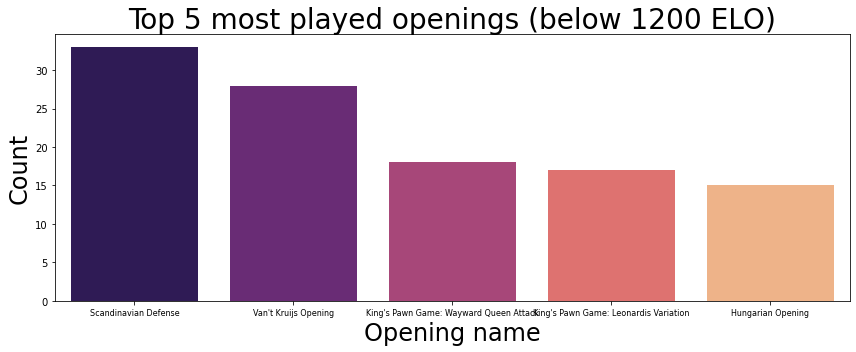

In [3]:
#  Displaying top 5 most played openings for players below 1200 ELO rating

beginner = df[(df['white_rating'] < 1200) & (df['black_rating'] < 1200)]['opening_name'].value_counts().head(5)
plt.figure(figsize=(12, 5))
plt.title('Top 5 most played openings (below 1200 ELO)', fontsize=28)
plt.xlabel('Opening name', fontsize=24)
plt.xticks(fontsize=8)
plt.ylabel('Count', fontsize=24)
plt.yticks(fontsize=10)
sns.barplot(x=beginner.index, y=beginner.values, palette='magma')
plt.tight_layout()
plt.show()

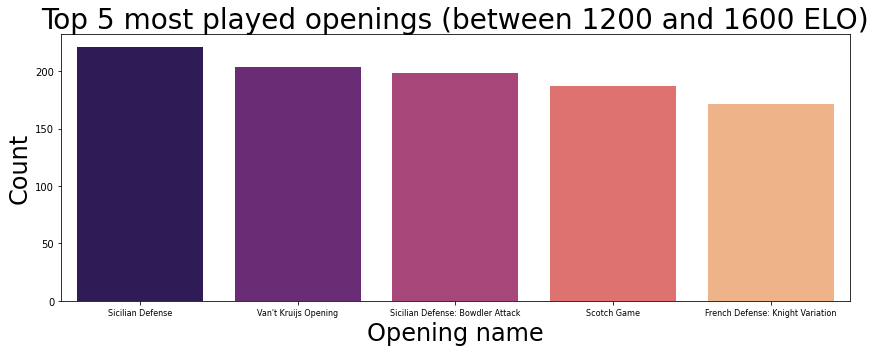

In [4]:
#  Displaying top 5 most played openings for players between 1200-1800 ELO rating
intermediate = df[(df['white_rating'].between(1200, 1800)) & (df['black_rating'].between(1200, 1800))]['opening_name'].value_counts().head(5)
plt.figure(figsize=(12, 5))
plt.title('Top 5 most played openings (between 1200 and 1600 ELO)', fontsize=28)
plt.xlabel('Opening name', fontsize=24)
plt.xticks(fontsize=8)
plt.ylabel('Count', fontsize=24)
plt.yticks(fontsize=10)
sns.barplot(x=intermediate.index, y=intermediate.values, palette='magma')
plt.tight_layout()
plt.show()

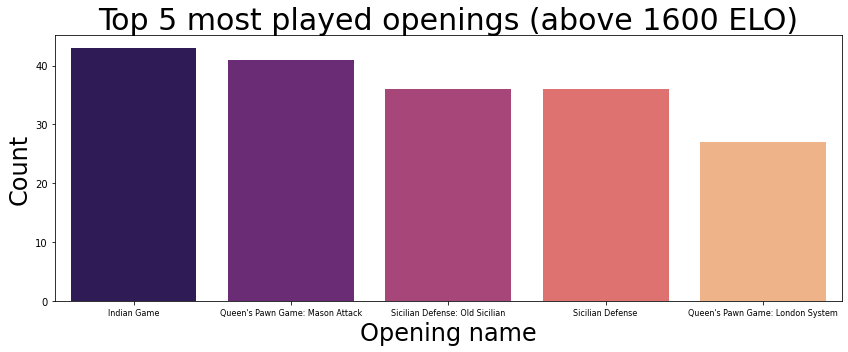

In [5]:
#  Displaying top 5 most played openings for players above 1800 ELO rating
advanced = df[(df['white_rating'] > 1800) & (df['black_rating'] > 1800)]['opening_name'].value_counts().head(5)
plt.figure(figsize=(12, 5))
plt.title('Top 5 most played openings (above 1600 ELO)', fontsize=30)
plt.xlabel('Opening name', fontsize=24)
plt.xticks(fontsize=8)
plt.ylabel('Count', fontsize=24)
plt.yticks(fontsize=10)
sns.barplot(x=advanced.index, y=advanced.values, palette='magma')
plt.tight_layout()
plt.show()

###  Analysing how the game ended

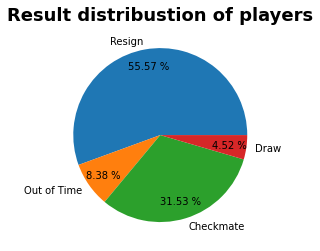

In [6]:

df1["victory_status"].astype('str')
resign = df1.loc[df1["victory_status"] == 'resign'].count()[0]
outoftime = df1.loc[df1["victory_status"] == 'outoftime'].count()[0]
mate = df1.loc[df1["victory_status"] == 'mate'].count()[0]
draw = df1.loc[df1["victory_status"] == 'draw'].count()[0]
weights = [resign, outoftime, mate, draw]
labels = ["Resign", "Out of Time", "Checkmate", "Draw"]
plt.title("Result distribustion of players", fontdict={'fontname': 'sans-serif', 'fontweight': 'bold', 'fontsize': 18})
plt.pie(weights, labels=labels, autopct='%.2f %%', pctdistance=0.8)
plt.show()

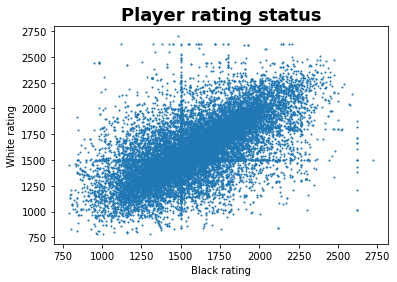

'The linear relationship in the above scatter plot indicates that majority of players \n   played open challenges rather than creating custom games '

In [7]:
# Some more visualisation
plt.title("Player rating status", fontdict={'fontname': 'sans-serif', 'fontweight': 'bold', 'fontsize': 18})
plt.xlabel("Black rating")
plt.ylabel("White rating")
plt.scatter(df1["black_rating"], df1["white_rating"], s=1)
plt.show()
'''The linear relationship in the above scatter plot indicates that majority of players 
   played open challenges rather than creating custom games '''

In [8]:
from sklearn.preprocessing import LabelEncoder  # Assigning rated and winner labels integer values
encoder = LabelEncoder()
df["winner_cat"] = encoder.fit_transform(df["winner"])
df["rated_cat"] = encoder.fit_transform(df["rated"])
df["victory_status_cat"] = encoder.fit_transform((df["victory_status"]))
df.drop(["winner", "victory_status", "rated"], axis=1, inplace=True)
print(df["winner_cat"].value_counts())

2    10001
0     9107
1      950
Name: winner_cat, dtype: int64


### Cleaning the data

              turns  white_rating  black_rating    winner_cat     rated_cat  \
count  20058.000000  20058.000000  20058.000000  20058.000000  20058.000000   
mean      60.465999   1596.631868   1588.831987      1.044571      0.805414   
std       33.570585    291.253376    291.036126      0.975038      0.395891   
min        1.000000    784.000000    789.000000      0.000000      0.000000   
25%       37.000000   1398.000000   1391.000000      0.000000      1.000000   
50%       55.000000   1567.000000   1562.000000      1.000000      1.000000   
75%       79.000000   1793.000000   1784.000000      2.000000      1.000000   
max      349.000000   2700.000000   2723.000000      2.000000      1.000000   

       victory_status_cat   Time_format     Increment  
count        20058.000000  20058.000000  20058.000000  
mean             2.150065     13.824110      5.249626  
std              1.014535     17.160179     14.289591  
min              0.000000      0.000000      0.000000  
25%     

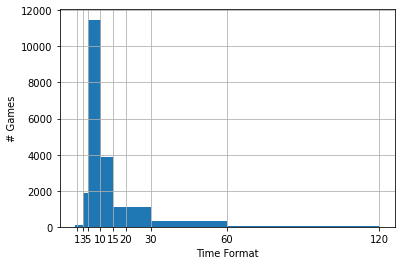

In [9]:

def get_increment(address):
    """returns Increment in seconds"""
    return address.split("+")[1].strip(" ")


def get_timeformat(address):
    """returns Time format in minutes"""
    return address.split("+")[0].strip("")


df['Time_format'] = df['increment_code'].apply(lambda x: f"{get_timeformat(x)}")
df['Increment'] = df['increment_code'].apply(lambda x: f"{ get_increment(x)}")
df["Time_format"] = pd.to_numeric(df["Time_format"])
df["Increment"] = pd.to_numeric(df["Increment"])

df.drop(["opening_name"], axis=1, inplace=True)

df.drop("increment_code", axis=1, inplace=True)

print(df.describe())
df["Time_format"].hist(bins=[0, 1.1, 3.1, 5.1, 10.1, 15.1, 20.1, 30.1, 60.1, 120.1], histtype='stepfilled')
plt.xticks([1, 3, 5, 10, 15, 20, 30, 60, 120])

plt.xlabel("Time Format")
plt.ylabel("# Games")
plt.show()

### Data preprocessing

In [10]:
def standardize(val):
    """Standardizes number of turns"""
    p = (val - val.mean())/val.std()
    return p


df["turns"] = standardize(df["turns"])

In [11]:
#  Passing only numeric labels

X = df.loc[:, ("turns", "victory_status_cat", "rated_cat")]
y = df.loc[:, "winner_cat"]

###  Trying out a bunch of Classification models

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
#  Implementing Decision Tree Classifier on training data
from sklearn.tree import DecisionTreeClassifier
tree_cls = DecisionTreeClassifier()
tree_cls.fit(X_train, y_train)
#  Implementing Decision Tree Classifier on test data
y_test_cls = tree_cls.predict(X_test)
from sklearn.metrics import accuracy_score
acc_dt = accuracy_score(y_test, y_test_cls)
print(acc_dt)

0.8959787304752409


In [14]:
#  Implementing K-Neighbours Classifier on training data
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn_model.fit(X_train, y_train)
#  Implementing K-Neighbours Classifier on test data
y_test_knn = knn_model.predict(X_test)
acc_knn = accuracy_score(y_test, y_test_knn)
print(acc_knn)

0.8620804253904952


In [15]:
#  Implementing SGD Classifier on training data
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)
#  Implementing SGD Classifier on test data
y_test_sgd = sgd_clf.predict(X_test)
acc_sgd = accuracy_score(y_test, y_test_sgd)
print("SDGC Classifier score: ", acc_sgd)

SDGC Classifier score:  0.49767364572947825


In [16]:
#  Implementing Logistic Regression Classifier on training data
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression()
log_clf.fit(X_train, y_train)
#  Implementing Logistic Regression on test data
y_test_log = log_clf.predict(X_test)

###  Implementing Voting classifier to get the votes among various classifiers

In [17]:

from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators=[('dt', tree_cls), ('log', log_clf),
                                          ('knn', knn_model)], voting='hard')  # SDGC Classifier is not included due to its poor performance
voting_clf.fit(X_train, y_train)
for clf in (tree_cls, log_clf, knn_model,  voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

DecisionTreeClassifier 0.8959787304752409
LogisticRegression 0.5473579262213359
KNeighborsClassifier 0.8620804253904952
VotingClassifier 0.8777002326354271


###  Implementing Ensemble with Bagging classifier

In [18]:
from sklearn.ensemble import BaggingClassifier
bag_clf = BaggingClassifier(tree_cls, n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
acc_bag = accuracy_score(y_test, y_pred)
print("Bagging Score= ", acc_bag)

Bagging Score=  0.7871385842472582
